In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from   getdist       import plots, MCSamples 
from   astropy.table import Table

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [3]:
from   schechter     import schechter, named_schechter

In [18]:
gama_vmax = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.19489,0.03903000056743622,0.26298999786376953,-19.896729767108155,7594841.842906503,3213540.202080313
0.1769,0.03903000056743622,0.22304376921442798,-19.345148105394813,4744480.2327530915,2423819.899631298
0.21845,0.03903000056743622,0.26298999786376953,-21.448400924157312,7594841.842906503,4468890.563670888
0.07737,0.03903000056743622,0.11292987662789934,-17.85082186533015,635194.7011307261,189455.44383488595
0.13108,0.03903000056743622,0.26298999786376953,-21.364310026743254,7594841.842906503,998008.3551280069
0.12964,0.03903000056743622,0.20426831744798465,-19.497313354368224,3682207.0915358975,965422.7798028872
0.22188,0.03903000056743622,0.26242798487028474,-20.131056249548763,7548868.367545325,4673684.697095223
0.1052,0.03903000056743622,0.1478515957436512,-18.506521074289658,1429470.252629071,510520.54314400506


In [7]:
gama_lf              = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_lumfn.fits')
gama_lf['S2N_N']     = gama_lf['PHI_N'] / gama_lf['PHI_N_ERROR']
gama_lf['S2N_IVMAX'] = gama_lf['PHI_IVMAX'] / gama_lf['PHI_IVMAX_ERROR']
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,S2N_N,S2N_IVMAX
float64,float64,float64,float64,float64,float64,float64
-23.42293176064758,4.388943709797751e-07,4.388943709797751e-07,4.389948126873385e-07,4.388943709797751e-07,1.0,1.0002288516650126
-23.111724644989394,8.777887419595502e-07,6.206903718888066e-07,8.777887419595503e-07,3.103451859444033e-07,1.414213562373095,2.82842712474619
-22.911188045606362,5.7056268227370755e-06,1.5824561590800933e-06,5.7056268227370755e-06,1.2172739685231488e-07,3.605551275463989,46.872166581031856
-22.642112086773523,3.950049338817976e-05,4.163717593568987e-06,3.950049338817975e-05,4.626352881743321e-08,9.48683298050514,853.814968245462
-22.312444870955268,0.00012771826195511455,7.486977109850151e-06,0.00012771826195511453,2.5728443676461012e-08,17.058722109231983,4964.088133786504
-22.018914188433687,0.000327854095121892,1.1995554045214675e-05,0.0003278540951218919,1.6058305281411882e-08,27.331300737432898,20416.481650862366
-21.722028909789106,0.0007540205293432536,1.819162900709951e-05,0.0007540205293432535,1.0588841098428122e-08,41.448763552125406,71208.97578255144
-21.434067411608222,0.00148302407954066,2.551256397420412e-05,0.0014830240795406598,7.550329675704091e-09,58.129166517334475,196418.45366207312
-21.13374389191792,0.002429280343373055,3.265267934241e-05,0.0024292803433730546,5.899309727626018e-09,74.39758060582348,411790.60865323275


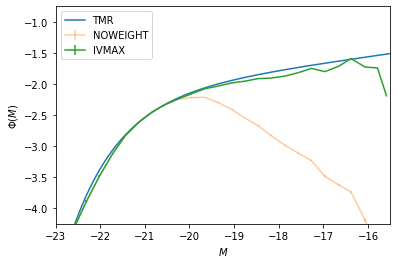

In [20]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR')

pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -.75)
pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)

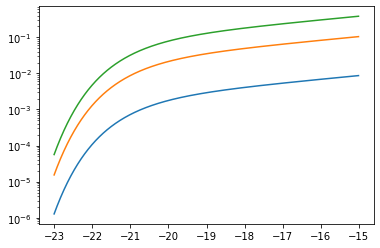

In [16]:
for d8 in [-0.75, 2., 10.]:
    Ms = np.arange(-23., -15., 0.01)
    sc = named_schechter(Ms, named_type='TMR')

    sc *= (1. + d8)
    
    pl.semilogy(Ms, sc)

In [7]:
root = '/global/cscratch1/sd/mjwilson/norberg/GAMA4/cobaya/'

In [8]:
dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [9]:
samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [10]:
samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

Removed no burn in


In [11]:
tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [12]:
g = plots.get_subplot_plotter()

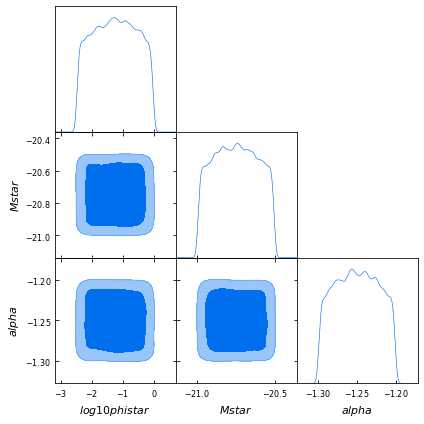

In [13]:
g.triangle_plot([samples], filled=True)        

# Done.